In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks\Support Notebooks for Modules
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
# from modules.lib.CheXpertData import *
# from modules.lib.Metrics import *
# from modules.lib.TrainingLoop import *
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale(layers=18) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

In [5]:
standardTraining = StandardTraining(number_images=500, 
                                     batch_size=1, 
                                     learning_rate=1e-3, 
                                     num_epochs=4,
                                     device=device, 
                                     net=net)

C:\git\Springboard-Public\Capstone Project 2\modules\lib\CheXpertData.py:255: UserWarning: 
Feature Imbalance Detected (train % - val %):
   Lung_Opacity: 10.02%
   Edema: 5.97%
   Pneumothorax: 3.62%
   Pleural_Effusion: 2.11%

  self.warnFeatureImbalance(train, value)


Number of Training Images: 396
Number of Validation Images: 104


In [6]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/4]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 143.1999         
Time of Completion: 2020-07-30 17:03:30.848457          
Training Duration: 0:00:23.675662          
Validation Duration: 0:00:01.341411

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,45,0.000000,0.000000,0.000000,0.474137,0.108464
4,Edema,96,0.010417,0.125000,0.019231,0.442049,0.212677
5,Consolidation,18,0.000000,0.000000,0.000000,0.549236,0.071101
7,Atelectasis,57,0.052632,0.272727,0.088235,0.486881,0.161521
9,Pleural_Effusion,134,0.119403,0.333333,0.175824,0.468497,0.322100



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,14,0.0,0.0,0.0,0.481746,0.144134
4,Edema,19,0.0,0.0,0.0,0.416718,0.154211
5,Consolidation,5,0.0,0.0,0.0,0.351515,0.046629
7,Atelectasis,20,0.0,0.0,0.0,0.377381,0.152652
9,Pleural_Effusion,33,0.0,0.0,0.0,0.394793,0.259871


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/4]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 134.3462         
Time of Completion: 2020-07-30 17:03:50.394168          
Training Duration: 0:00:18.291066          
Validation Duration: 0:00:01.211759

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,45,0.0,0.0,0.0,0.487749,0.109246
4,Edema,96,0.0,0.0,0.0,0.387813,0.192464
5,Consolidation,18,0.0,0.0,0.0,0.377425,0.036187
7,Atelectasis,57,0.0,0.0,0.0,0.487243,0.150731
9,Pleural_Effusion,134,0.0,0.0,0.0,0.490600,0.328937



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,14,0.0,0.0,0.0,0.506349,0.165909
4,Edema,19,0.0,0.0,0.0,0.359752,0.141975
5,Consolidation,5,0.0,0.0,0.0,0.305051,0.040938
7,Atelectasis,20,0.0,0.0,0.0,0.366071,0.150161
9,Pleural_Effusion,33,0.0,0.0,0.0,0.399915,0.266589


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/4]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 133.4364         
Time of Completion: 2020-07-30 17:04:09.344471          
Training Duration: 0:00:17.727574          
Validation Duration: 0:00:01.181838

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,45,0.000000,0.000000,0.000000,0.473504,0.104979
4,Edema,96,0.000000,0.000000,0.000000,0.467847,0.218187
5,Consolidation,18,0.000000,0.000000,0.000000,0.405203,0.044607
7,Atelectasis,57,0.000000,0.000000,0.000000,0.452569,0.126314
9,Pleural_Effusion,134,0.119403,0.432432,0.187135,0.556227,0.385469



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,14,0.0,0.0,0.0,0.600000,0.218333
4,Edema,19,0.0,0.0,0.0,0.608050,0.236395
5,Consolidation,5,0.0,0.0,0.0,0.591919,0.073205
7,Atelectasis,20,0.0,0.0,0.0,0.457143,0.226449
9,Pleural_Effusion,33,0.0,0.0,0.0,0.594110,0.465761


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/4]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 133.6053         
Time of Completion: 2020-07-30 17:04:28.217980          
Training Duration: 0:00:17.635820          
Validation Duration: 0:00:01.199791

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,45,0.000000,0.00,0.000000,0.592719,0.154164
4,Edema,96,0.000000,0.00,0.000000,0.480451,0.232909
5,Consolidation,18,0.000000,0.00,0.000000,0.471340,0.044501
7,Atelectasis,57,0.000000,0.00,0.000000,0.474202,0.171237
9,Pleural_Effusion,134,0.052239,0.35,0.090909,0.479378,0.329718



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,14,0.0,0.0,0.0,0.594444,0.207402
4,Edema,19,0.0,0.0,0.0,0.547368,0.201369
5,Consolidation,5,0.0,0.0,0.0,0.567677,0.077579
7,Atelectasis,20,0.0,0.0,0.0,0.454762,0.205013
9,Pleural_Effusion,33,0.0,0.0,0.0,0.600939,0.501985


Training Duration: 0:01:22.425491



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.141414
Hamming Loss,0.140362
Combined Recall,0.101599
Combined Precision,0.186869
Combined F1,0.124411


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,20,0.000000,0.000000,0.000000,0.540027,0.094249
1,Cardiomegaly,45,0.000000,0.000000,0.000000,0.592719,0.154164
2,Lung_Opacity,192,0.390625,0.462963,0.423729,0.431985,0.435167
3,Lung_Lesion,22,0.000000,0.000000,0.000000,0.531235,0.063919
4,Edema,96,0.000000,0.000000,0.000000,0.480451,0.232909
5,Consolidation,18,0.000000,0.000000,0.000000,0.471340,0.044501
6,Pneumonia,6,0.000000,0.000000,0.000000,0.475641,0.019734
7,Atelectasis,57,0.000000,0.000000,0.000000,0.474202,0.171237
8,Pneumothorax,41,0.000000,0.000000,0.000000,0.512607,0.115751
9,Pleural_Effusion,134,0.052239,0.350000,0.090909,0.479378,0.329718


***** ROC *****


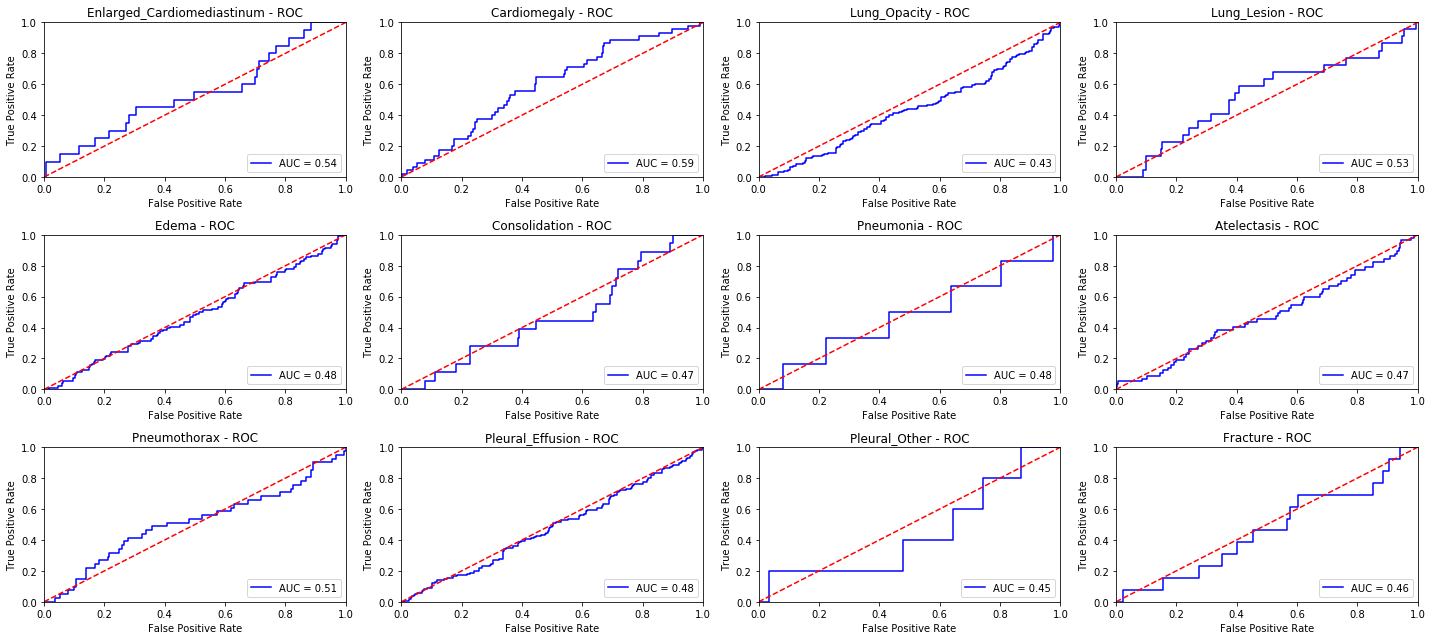

***** Precision / Recall *****


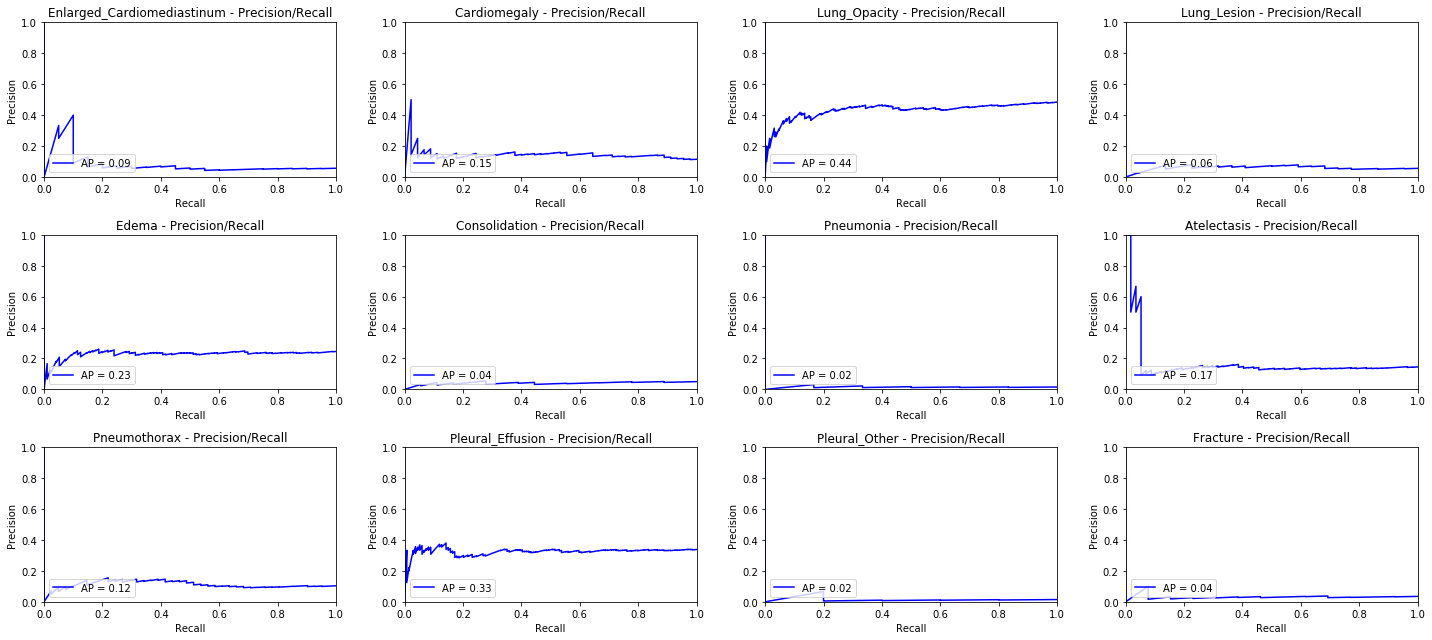


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.221154
Hamming Loss,0.130609
Combined Recall,0.000000
Combined Precision,0.000000
Combined F1,0.000000


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,7,0.0,0.0,0.0,0.483063,0.070175
1,Cardiomegaly,14,0.0,0.0,0.0,0.594444,0.207402
2,Lung_Opacity,40,0.0,0.0,0.0,0.532813,0.415050
3,Lung_Lesion,7,0.0,0.0,0.0,0.309278,0.066014
4,Edema,19,0.0,0.0,0.0,0.547368,0.201369
5,Consolidation,5,0.0,0.0,0.0,0.567677,0.077579
6,Pneumonia,4,0.0,0.0,0.0,0.427500,0.040601
7,Atelectasis,20,0.0,0.0,0.0,0.454762,0.205013
8,Pneumothorax,7,0.0,0.0,0.0,0.524300,0.213401
9,Pleural_Effusion,33,0.0,0.0,0.0,0.600939,0.501985


***** ROC *****


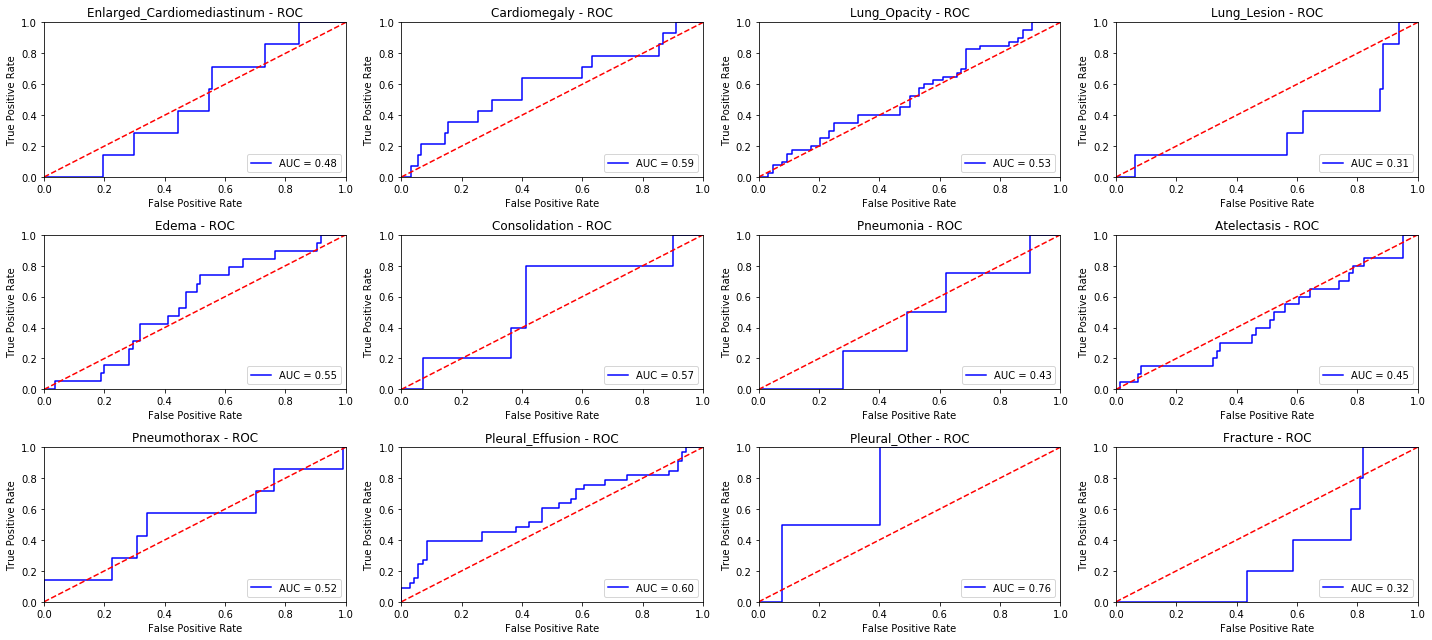

***** Precision / Recall *****


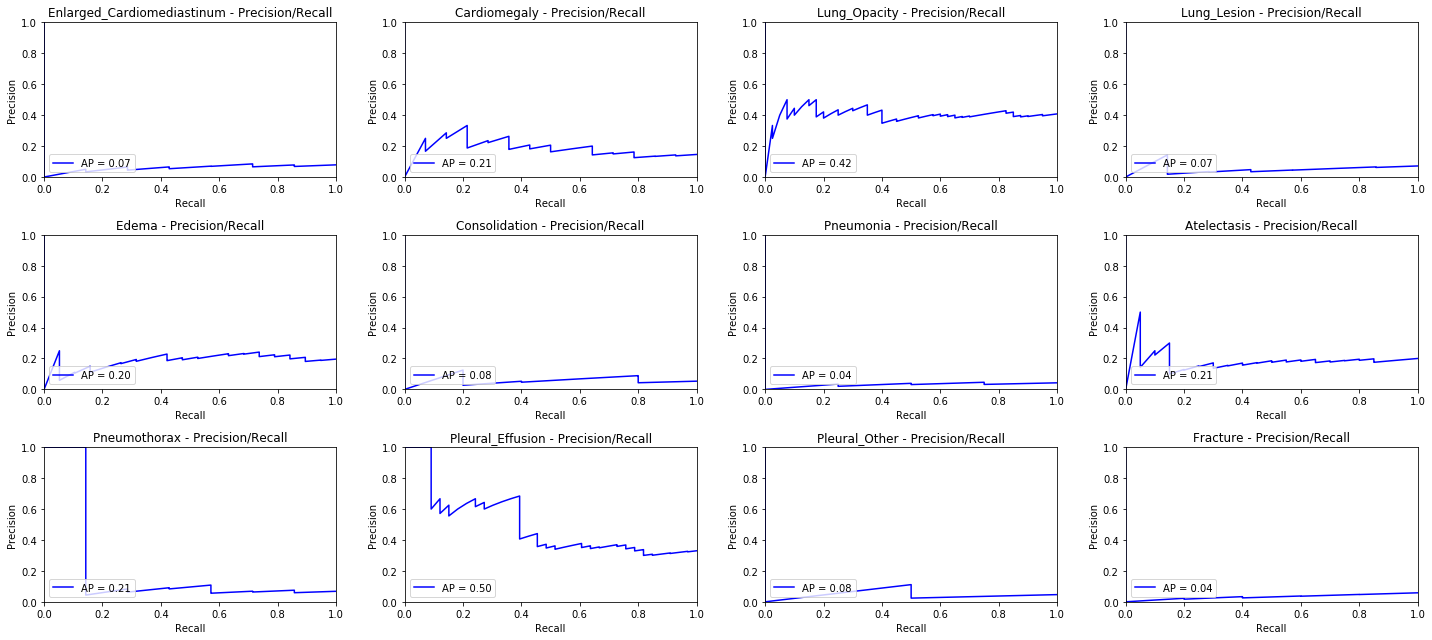

In [7]:
standardTraining.displayMetrics()